<a href="https://colab.research.google.com/github/Aspher979/Aspher979/blob/main/MiniProject_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

## DATASET ->
###INPUT ATTRIBUTES : 60(*Type -> Number(default)*)
### OUTPUT ATTRIBUTE : 1(*Binary classification* **(ROCK, MINE)**)

In [4]:
# Load the dataset from a CSV file
data = pd.read_csv('/content/sonar_csv.csv')

# Display the first 5 rows of the dataset
print(data.head())

   attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
0       0.0200       0.0371       0.0428       0.0207       0.0954   
1       0.0453       0.0523       0.0843       0.0689       0.1183   
2       0.0262       0.0582       0.1099       0.1083       0.0974   
3       0.0100       0.0171       0.0623       0.0205       0.0205   
4       0.0762       0.0666       0.0481       0.0394       0.0590   

   attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
0       0.0986       0.1539       0.1601       0.3109        0.2111  ...   
1       0.2583       0.2156       0.3481       0.3337        0.2872  ...   
2       0.2280       0.2431       0.3771       0.5598        0.6194  ...   
3       0.0368       0.1098       0.1276       0.0598        0.1264  ...   
4       0.0649       0.1209       0.2467       0.3564        0.4459  ...   

   attribute_52  attribute_53  attribute_54  attribute_55  attribute_56  \
0        0.0027        0.0065        0.0159    

###Size of Dataset

In [5]:
# Get the size of the dataset
num_rows, num_columns = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 208
Number of columns: 61


In [6]:
#'data' is your DataFrame
data_types = data.dtypes

# Display the data types of each column
print(data_types)


attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
Class            object
Length: 61, dtype: object


In [7]:
unique_classes = data['Class'].unique()
print(unique_classes)

['Rock' 'Mine']


###SUMMARY STATASTICS

In [8]:
numerical_summary = data.iloc[:, :60].describe()
print(numerical_summary)

       attribute_1  attribute_2  attribute_3  attribute_4  attribute_5  \
count   208.000000   208.000000   208.000000   208.000000   208.000000   
mean      0.029164     0.038437     0.043832     0.053892     0.075202   
std       0.022991     0.032960     0.038428     0.046528     0.055552   
min       0.001500     0.000600     0.001500     0.005800     0.006700   
25%       0.013350     0.016450     0.018950     0.024375     0.038050   
50%       0.022800     0.030800     0.034300     0.044050     0.062500   
75%       0.035550     0.047950     0.057950     0.064500     0.100275   
max       0.137100     0.233900     0.305900     0.426400     0.401000   

       attribute_6  attribute_7  attribute_8  attribute_9  attribute_10  ...  \
count   208.000000   208.000000   208.000000   208.000000    208.000000  ...   
mean      0.104570     0.121747     0.134799     0.178003      0.208259  ...   
std       0.059105     0.061788     0.085152     0.118387      0.134416  ...   
min       0.0

In [9]:
class_distribution = data['Class'].value_counts()
print(class_distribution)

Mine    111
Rock     97
Name: Class, dtype: int64


##1)CHECKING FOR OUTLIERS
**bold text**

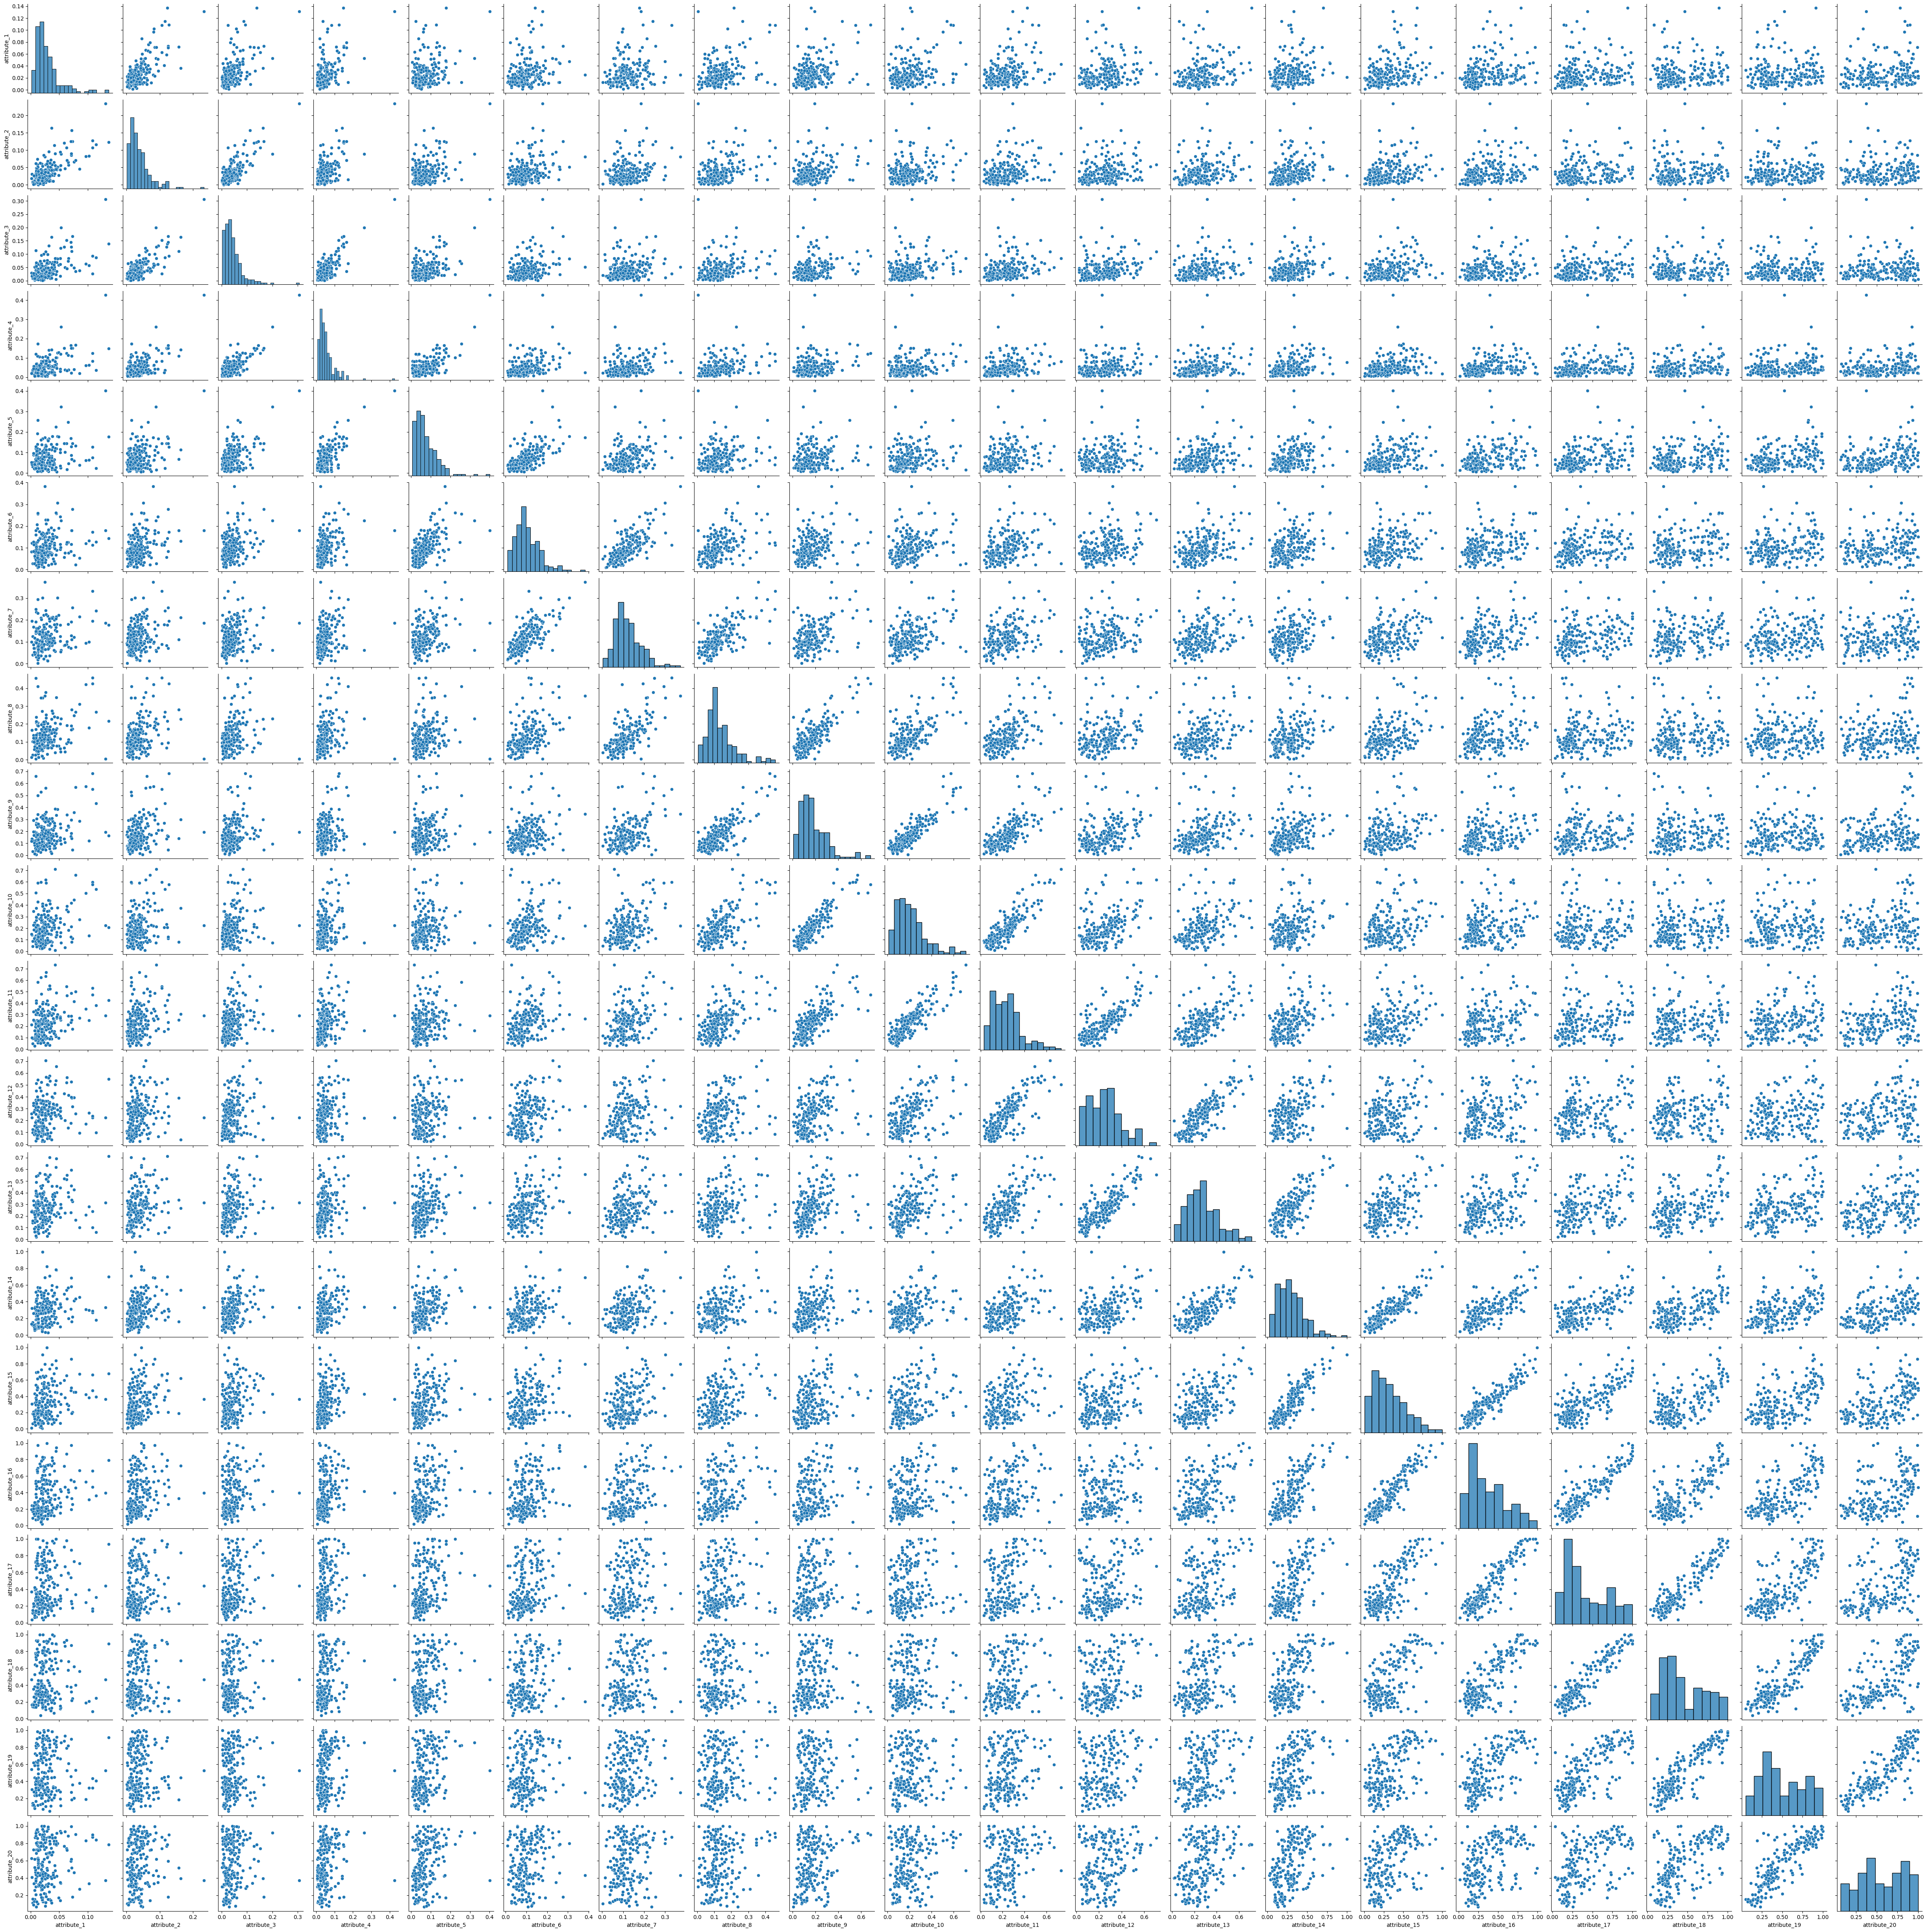

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to visualize
attributes_to_visualize = data.iloc[:, :10]

# Create a pair plot
sns.pairplot(attributes_to_visualize)
plt.show()


In [17]:
from scipy import stats

data_R = data[data['Class'] == 'R']
data_M = data[data['Class'] == 'M']

# Calculate Z-Scores for each class
z_scores_R = stats.zscore(data_R.drop(columns=['Class']))
z_scores_M = stats.zscore(data_M.drop(columns=['Class']))

# Define a Z-Score threshold for outlier detection
z_score_threshold = 3

# Find and print the indices of the outlier rows for each class
outlier_indices_R = np.where(np.abs(z_scores_R) > z_score_threshold)
outlier_indices_M = np.where(np.abs(z_scores_M) > z_score_threshold)

print("Outlier indices for class R:", outlier_indices_R)
print("Outlier indices for class M:", outlier_indices_M)


Outlier indices for class R: (array([], dtype=int64), array([], dtype=int64))
Outlier indices for class M: (array([], dtype=int64), array([], dtype=int64))


### It seems that for both 'R' and 'M' classes, there are no outliers identified using the Z-Score method with the specified threshold. This means that all the data points within each class fall within the defined threshold and are not considered outliers based on Z-Scores.

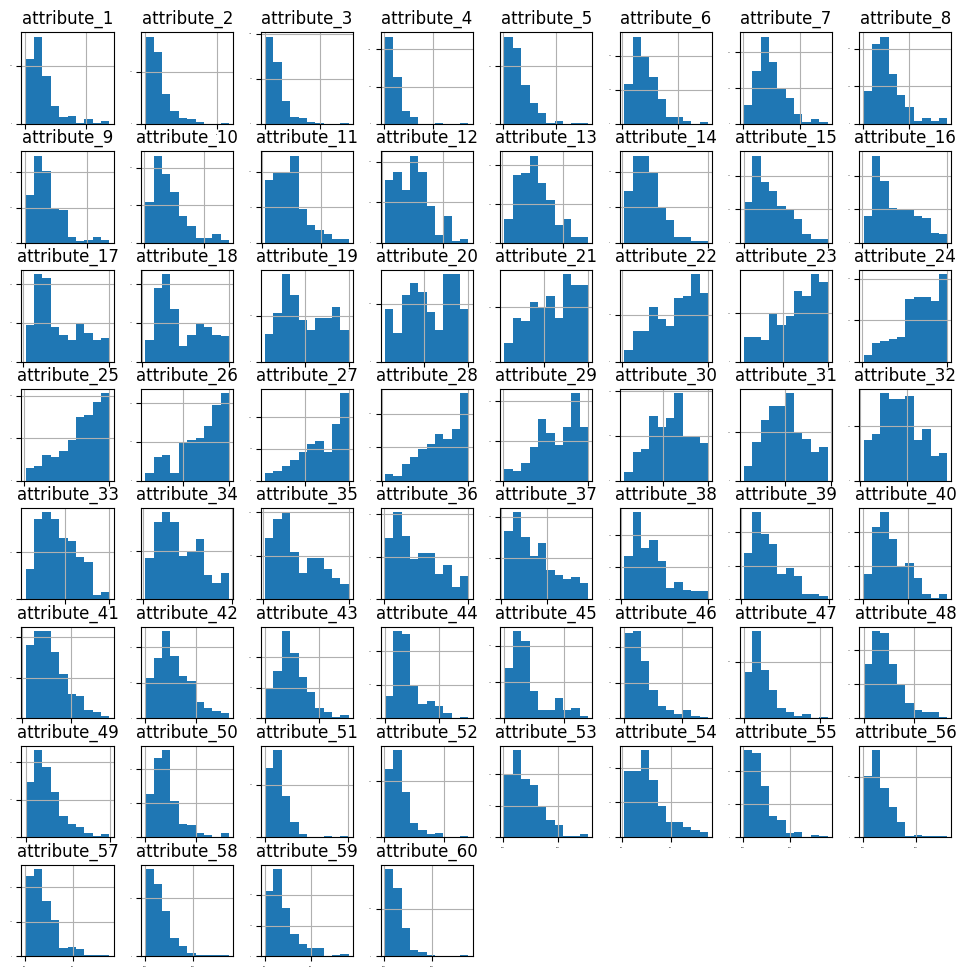

In [22]:
# histograms
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

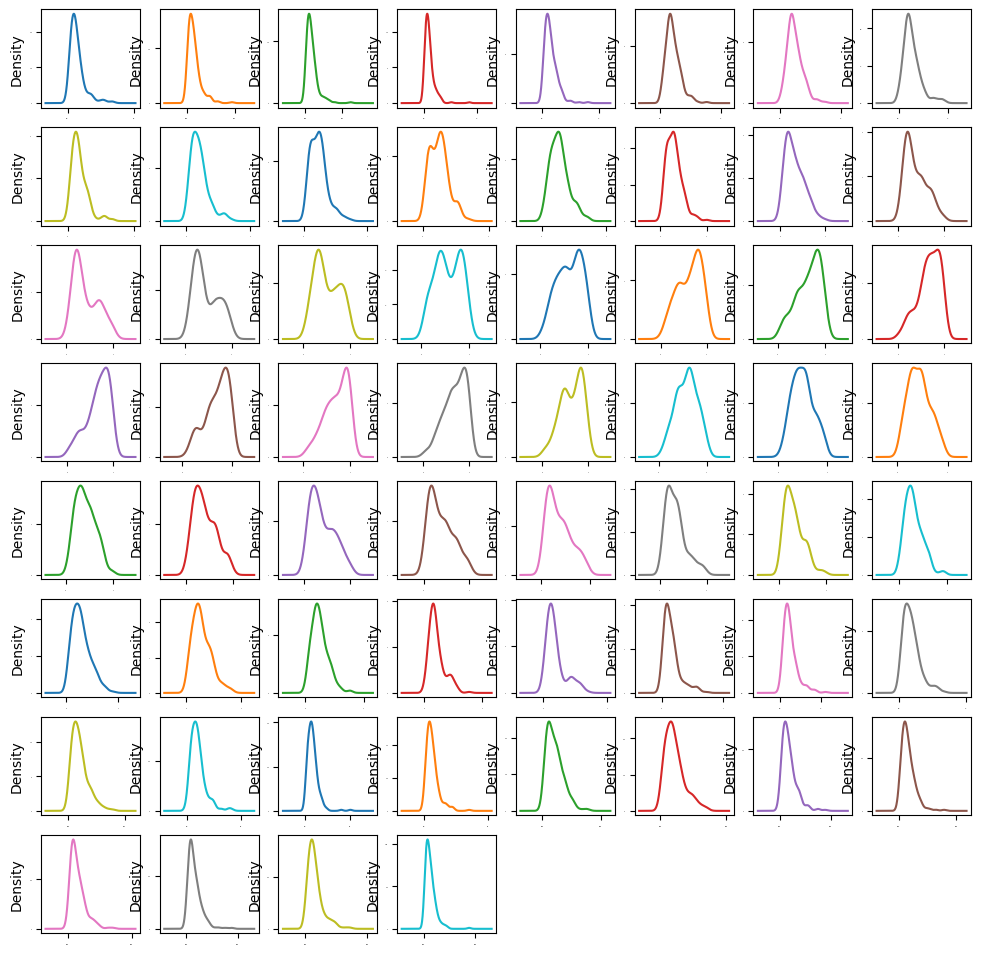

In [23]:
# density
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(12,12))
pyplot.show()

<ipython-input-24-97eb28dc705f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')


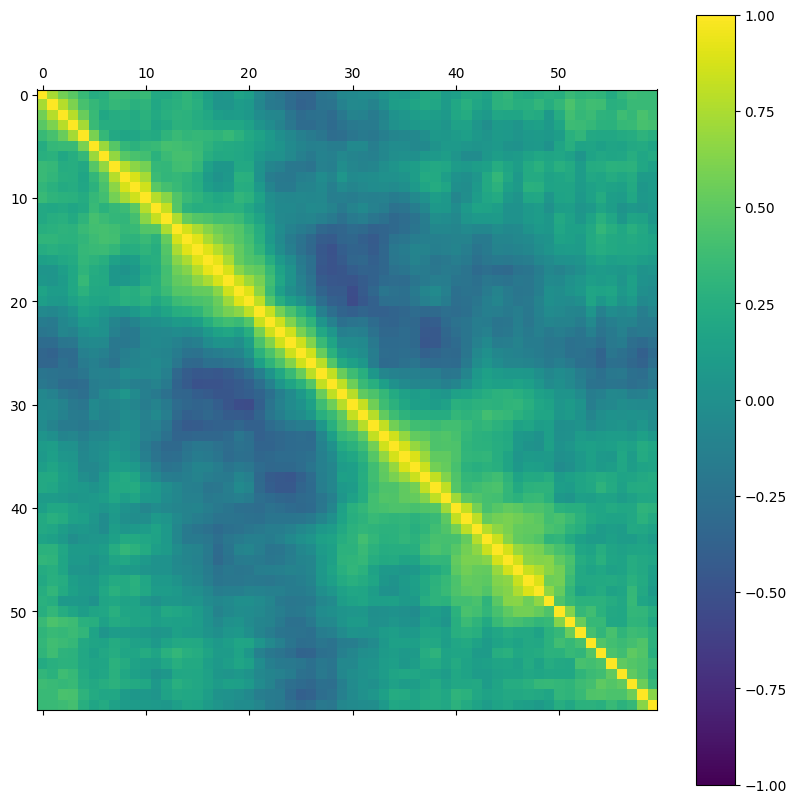

In [24]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
pyplot.show()

##2)DATA CLEANING

###2.1)Checking for missing values

In [18]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

print(missing_values)

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
Class           0
Length: 61, dtype: int64


###No missing values

###2.2)Checking for duplicate rows

In [19]:
# Check for duplicate rows
duplicates = data[data.duplicated(keep='first')]

# Print the duplicate rows (if any)
print(duplicates)

Empty DataFrame
Columns: [attribute_1, attribute_2, attribute_3, attribute_4, attribute_5, attribute_6, attribute_7, attribute_8, attribute_9, attribute_10, attribute_11, attribute_12, attribute_13, attribute_14, attribute_15, attribute_16, attribute_17, attribute_18, attribute_19, attribute_20, attribute_21, attribute_22, attribute_23, attribute_24, attribute_25, attribute_26, attribute_27, attribute_28, attribute_29, attribute_30, attribute_31, attribute_32, attribute_33, attribute_34, attribute_35, attribute_36, attribute_37, attribute_38, attribute_39, attribute_40, attribute_41, attribute_42, attribute_43, attribute_44, attribute_45, attribute_46, attribute_47, attribute_48, attribute_49, attribute_50, attribute_51, attribute_52, attribute_53, attribute_54, attribute_55, attribute_56, attribute_57, attribute_58, attribute_59, attribute_60, Class]
Index: []

[0 rows x 61 columns]


###No duplicate rows

##Train_Test_split

In [25]:
from sklearn.model_selection import train_test_split

array = data.values
X = array[:,0:-1].astype(float)
y = array[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Scale the input features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
print(X_train)
print(Y_train)

[[0.0025 0.0309 0.0171 ... 0.0016 0.0028 0.0014]
 [0.0392 0.0108 0.0267 ... 0.0044 0.0022 0.0014]
 [0.0067 0.0096 0.0024 ... 0.0034 0.0051 0.0031]
 ...
 [0.0201 0.0026 0.0138 ... 0.0024 0.0057 0.0044]
 [0.005  0.0017 0.027  ... 0.0063 0.0017 0.0028]
 [0.0294 0.0123 0.0117 ... 0.0006 0.0081 0.0043]]
['Rock' 'Mine' 'Rock' 'Rock' 'Rock' 'Rock' 'Rock' 'Mine' 'Rock' 'Mine'
 'Rock' 'Rock' 'Mine' 'Rock' 'Mine' 'Rock' 'Rock' 'Rock' 'Mine' 'Mine'
 'Mine' 'Mine' 'Rock' 'Rock' 'Mine' 'Mine' 'Rock' 'Mine' 'Mine' 'Rock'
 'Mine' 'Mine' 'Mine' 'Rock' 'Mine' 'Rock' 'Mine' 'Mine' 'Rock' 'Mine'
 'Rock' 'Rock' 'Mine' 'Mine' 'Mine' 'Mine' 'Rock' 'Rock' 'Rock' 'Rock'
 'Mine' 'Rock' 'Rock' 'Mine' 'Rock' 'Rock' 'Rock' 'Mine' 'Mine' 'Rock'
 'Mine' 'Mine' 'Rock' 'Mine' 'Rock' 'Mine' 'Mine' 'Rock' 'Rock' 'Rock'
 'Rock' 'Rock' 'Mine' 'Mine' 'Mine' 'Rock' 'Rock' 'Mine' 'Rock' 'Mine'
 'Rock' 'Mine' 'Rock' 'Rock' 'Mine' 'Rock' 'Rock' 'Mine' 'Mine' 'Mine'
 'Rock' 'Mine' 'Mine' 'Rock' 'Rock' 'Rock' 'Mine' 'Mine' 'Roc

In [27]:
print(X_train_scaled)
print(X_test_scaled)

[[-1.1642717  -0.16819188 -0.72979048 ... -0.94984413 -0.83298058
  -1.18068856]
 [ 0.4845674  -0.86506142 -0.43825481 ... -0.49814825 -0.93521702
  -1.18068856]
 [-0.97557622 -0.90666557 -1.17620448 ... -0.65946821 -0.44107425
  -0.74819854]
 ...
 [-0.37354777 -1.14935645 -0.83000587 ... -0.82078816 -0.33883782
  -0.41747088]
 [-1.05195296 -1.18055956 -0.42914432 ... -0.19164033 -1.02041405
  -0.82452031]
 [ 0.04427794 -0.81305623 -0.8937793  ... -1.11116408  0.07010792
  -0.44291147]]
[[-0.72398224 -0.16819188 -0.73586414 ...  0.27618754 -1.15672929
  -0.41747088]
 [ 0.40369791  0.79217061  0.6580408  ...  0.61495945  0.35977781
   1.66865746]
 [-0.79586624  0.33105793 -0.37144455 ... -0.24003632 -1.02041405
  -0.62099559]
 ...
 [ 0.08471269 -0.01564333  0.23895827 ...  0.0664716  -0.69666534
  -0.31570852]
 [-0.37354777 -0.6674417  -0.2044189  ...  0.48590348  0.08714732
  -0.62099559]
 [ 0.36326316  4.41866579  3.71916539 ...  0.30845153  0.56425068
   0.19310327]]


###Nominal Encoding/label encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Y_train and Y_test labels
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

In [29]:
print(Y_train_encoded)
print(Y_test_encoded)

[1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0]
[1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 1]


##Select Machine Learning Algorithms:


1.   Logistic Regression
2.   Decision Trees
3.   Random Forest
4.   Support Vector Machines (SVM)
5.   k-Nearest Neighbors (k-NN)
6.   Naive Bayes


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###Create instances of the machine learning algorithms

In [41]:
# Create instances of the machine learning algorithms
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

###Train the models using the training data

In [42]:
# Train the models using the training data
logistic_regression.fit(X_train_scaled, Y_train_encoded)
decision_tree.fit(X_train_scaled, Y_train_encoded)
random_forest.fit(X_train_scaled, Y_train_encoded)
svm.fit(X_train_scaled, Y_train_encoded)
knn.fit(X_train_scaled, Y_train_encoded)
naive_bayes.fit(X_train_scaled, Y_train_encoded)

GaussianNB()

#### Make predictions on the test data using each model

In [43]:
# Make predictions on the test data using each model
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)
decision_tree_predictions = decision_tree.predict(X_test_scaled)
random_forest_predictions = random_forest.predict(X_test_scaled)
svm_predictions = svm.predict(X_test_scaled)
knn_predictions = knn.predict(X_test_scaled)
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)

###1)Logistic Regression:



In [37]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, Y_train_encoded)
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)

###2)Decision Trees:

In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, Y_train_encoded)
decision_tree_predictions = decision_tree.predict(X_test_scaled)

###3)Random Forest:

In [35]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, Y_train_encoded)
random_forest_predictions = random_forest.predict(X_test_scaled)

###4)Support Vector Machines (SVM)

In [38]:
svm = SVC()
svm.fit(X_train_scaled, Y_train_encoded)
svm_predictions = svm.predict(X_test_scaled)

###5)k-Nearest Neighbors (k-NN)

In [39]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, Y_train_encoded)
knn_predictions = knn.predict(X_test_scaled)

###6)Naive Bayes

In [40]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, Y_train_encoded)
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)

##MODEL PERFORMANCE

###1)Logistic Regression

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

logistic_regression_accuracy = accuracy_score(Y_test_encoded, logistic_regression_predictions)
logistic_regression_precision = precision_score(Y_test_encoded, logistic_regression_predictions)
logistic_regression_recall = recall_score(Y_test_encoded, logistic_regression_predictions)
logistic_regression_f1 = f1_score(Y_test_encoded, logistic_regression_predictions)
logistic_regression_roc_auc = roc_auc_score(Y_test_encoded, logistic_regression.predict_proba(X_test_scaled)[:,1])

model_performance = {
    "Logistic Regression": {
        "Accuracy": logistic_regression_accuracy,
        "Precision": logistic_regression_precision,
        "Recall": logistic_regression_recall,
        "F1-Score": logistic_regression_f1,
        "ROC-AUC": logistic_regression_roc_auc
    },
}

#model performance summary
for model, metrics in model_performance.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Model: Logistic Regression
Accuracy: 0.7142857142857143
Precision: 0.5789473684210527
Recall: 0.7333333333333333
F1-Score: 0.6470588235294117
ROC-AUC: 0.8271604938271605



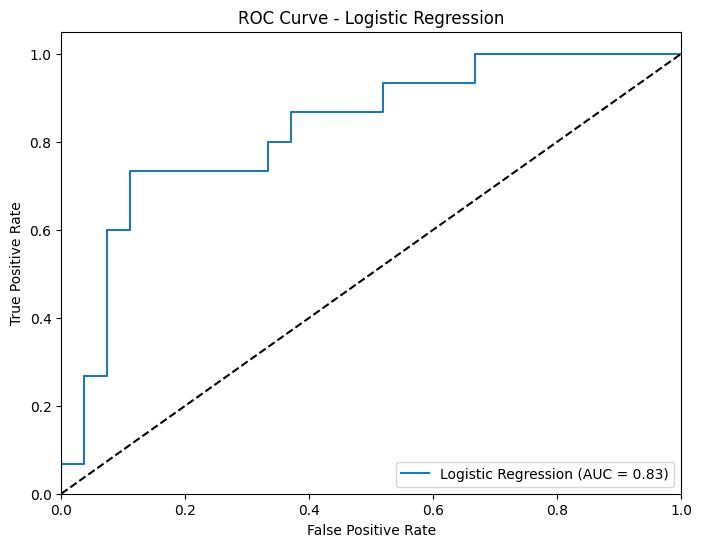

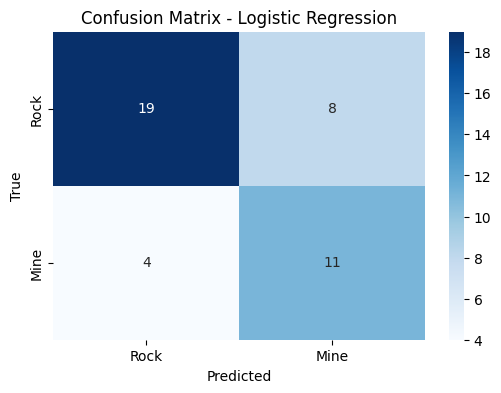

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns

def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rock", "Mine"], yticklabels=["Rock", "Mine"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

logistic_regression_fpr, logistic_regression_tpr, _ = roc_curve(Y_test_encoded, logistic_regression.predict_proba(X_test_scaled)[:, 1])
logistic_regression_auc = roc_auc_score(Y_test_encoded, logistic_regression.predict_proba(X_test_scaled)[:, 1])
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)

plot_roc_curve(logistic_regression_fpr, logistic_regression_tpr, logistic_regression_auc, "Logistic Regression")
plot_confusion_matrix(Y_test_encoded, logistic_regression_predictions, "Logistic Regression")


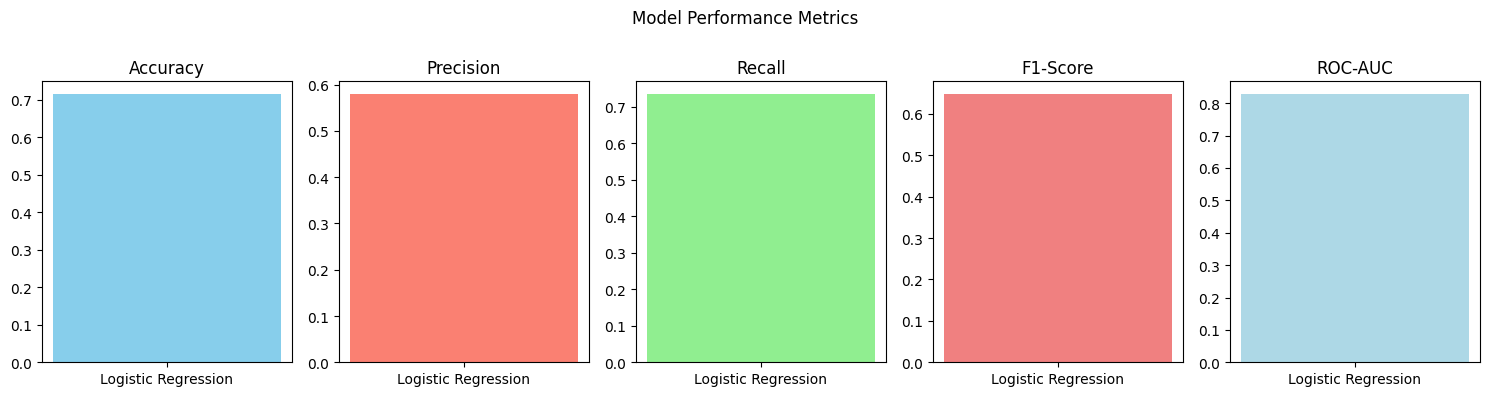

In [65]:
import matplotlib.pyplot as plt

# Model names and corresponding metric values
models = ["Logistic Regression"]
accuracy = [0.7143]
precision = [0.5789]
recall = [0.7333]
f1_score = [0.6471]
roc_auc = [0.8272]

# Create subplots for each metric
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
fig.suptitle('Model Performance Metrics')

# Bar chart for accuracy
axs[0].bar(models, accuracy, color='skyblue')
axs[0].set_title('Accuracy')

# Bar chart for precision
axs[1].bar(models, precision, color='salmon')
axs[1].set_title('Precision')

# Bar chart for recall
axs[2].bar(models, recall, color='lightgreen')
axs[2].set_title('Recall')

# Bar chart for F1-score
axs[3].bar(models, f1_score, color='lightcoral')
axs[3].set_title('F1-Score')

# Bar chart for ROC-AUC
axs[4].bar(models, roc_auc, color='lightblue')
axs[4].set_title('ROC-AUC')

# Adjust spacing
plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.show()


###2)Decision Trees:

In [46]:
decision_trees_predictions = decision_tree.predict(X_test_scaled)

decision_trees_accuracy = accuracy_score(Y_test_encoded, decision_trees_predictions)
decision_trees_precision = precision_score(Y_test_encoded, decision_trees_predictions)
decision_trees_recall = recall_score(Y_test_encoded, decision_trees_predictions)
decision_trees_f1 = f1_score(Y_test_encoded, decision_trees_predictions)



model_performance["Decision Trees"] = {
    "Accuracy": decision_trees_accuracy,
    "Precision": decision_trees_precision,
    "Recall": decision_trees_recall,
    "F1-Score": decision_trees_f1
}

#model performance summary
for model, metrics in model_performance.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Model: Logistic Regression
Accuracy: 0.7142857142857143
Precision: 0.5789473684210527
Recall: 0.7333333333333333
F1-Score: 0.6470588235294117
ROC-AUC: 0.8271604938271605

Model: Decision Trees
Accuracy: 0.7857142857142857
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272



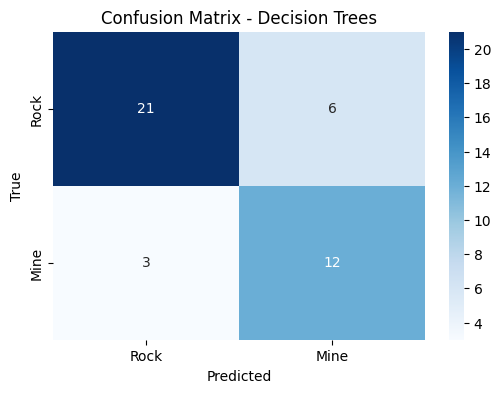

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rock", "Mine"], yticklabels=["Rock", "Mine"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(Y_test_encoded, decision_tree_predictions, "Decision Trees")


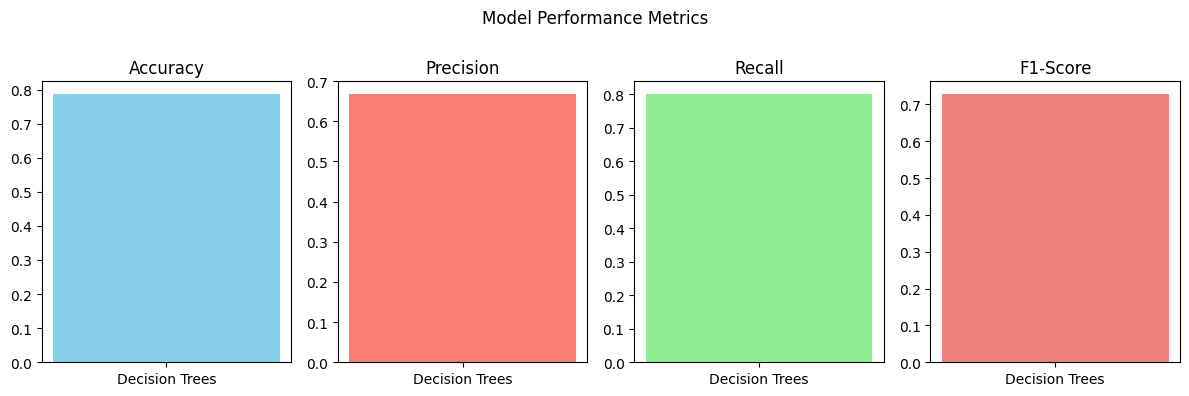

In [66]:
import matplotlib.pyplot as plt

# Model names and corresponding metric values
models = ["Decision Trees"]
accuracy = [0.7857]
precision = [0.6667]
recall = [0.8]
f1_score = [0.7273]

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Model Performance Metrics')

axs[0].bar(models, accuracy, color='skyblue')
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color='salmon')
axs[1].set_title('Precision')

axs[2].bar(models, recall, color='lightgreen')
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color='lightcoral')
axs[3].set_title('F1-Score')

plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.show()


###3)Random Forest

In [48]:
random_forest_predictions = random_forest.predict(X_test_scaled)

random_forest_accuracy = accuracy_score(Y_test_encoded, random_forest_predictions)
random_forest_precision = precision_score(Y_test_encoded, random_forest_predictions)
random_forest_recall = recall_score(Y_test_encoded, random_forest_predictions)
random_forest_f1 = f1_score(Y_test_encoded, random_forest_predictions)


random_forest_roc_auc = roc_auc_score(Y_test_encoded, random_forest.predict_proba(X_test_scaled)[:,1])


model_performance["Random Forest"] = {
    "Accuracy": random_forest_accuracy,
    "Precision": random_forest_precision,
    "Recall": random_forest_recall,
    "F1-Score": random_forest_f1,
    "ROC-AUC": random_forest_roc_auc
}

for model, metrics in model_performance.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Model: Logistic Regression
Accuracy: 0.7142857142857143
Precision: 0.5789473684210527
Recall: 0.7333333333333333
F1-Score: 0.6470588235294117
ROC-AUC: 0.8271604938271605

Model: Decision Trees
Accuracy: 0.7857142857142857
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272

Model: Random Forest
Accuracy: 0.8571428571428571
Precision: 0.8461538461538461
Recall: 0.7333333333333333
F1-Score: 0.7857142857142856
ROC-AUC: 0.945679012345679



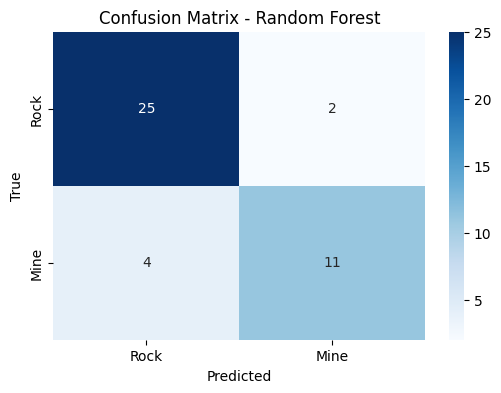

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rock", "Mine"], yticklabels=["Rock", "Mine"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(Y_test_encoded, random_forest_predictions, "Random Forest")


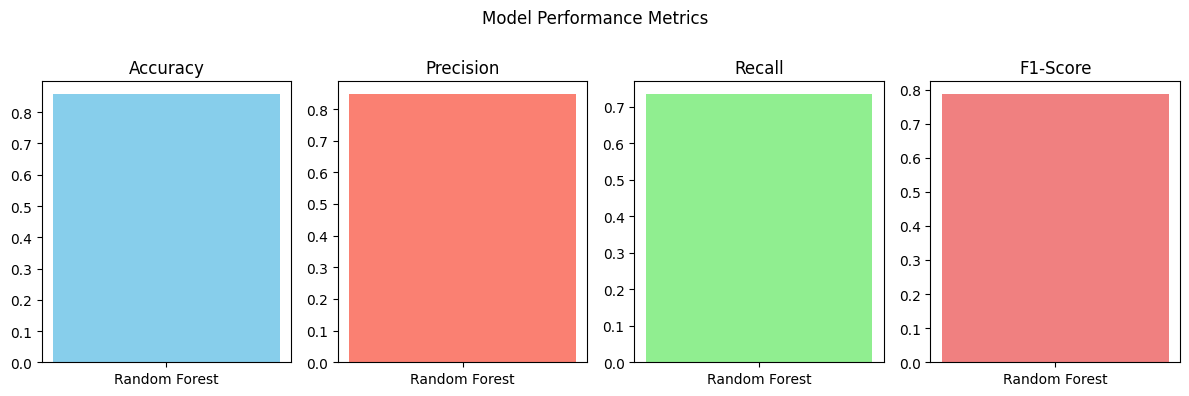

In [68]:
import matplotlib.pyplot as plt

models = ["Random Forest"]
accuracy = [0.8571]
precision = [0.8462]
recall = [0.7333]
f1_score = [0.7857]

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Model Performance Metrics')

axs[0].bar(models, accuracy, color='skyblue')
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color='salmon')
axs[1].set_title('Precision')

axs[2].bar(models, recall, color='lightgreen')
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color='lightcoral')
axs[3].set_title('F1-Score')

plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.show()


###4)KNN

In [49]:
knn_predictions = knn.predict(X_test_scaled)

knn_accuracy = accuracy_score(Y_test_encoded, knn_predictions)
knn_precision = precision_score(Y_test_encoded, knn_predictions)
knn_recall = recall_score(Y_test_encoded, knn_predictions)
knn_f1 = f1_score(Y_test_encoded, knn_predictions)

model_performance["k-NN"] = {
    "Accuracy": knn_accuracy,
    "Precision": knn_precision,
    "Recall": knn_recall,
    "F1-Score": knn_f1
}

#model performance summary
for model, metrics in model_performance.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


Model: Logistic Regression
Accuracy: 0.7142857142857143
Precision: 0.5789473684210527
Recall: 0.7333333333333333
F1-Score: 0.6470588235294117
ROC-AUC: 0.8271604938271605

Model: Decision Trees
Accuracy: 0.7857142857142857
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272

Model: Random Forest
Accuracy: 0.8571428571428571
Precision: 0.8461538461538461
Recall: 0.7333333333333333
F1-Score: 0.7857142857142856
ROC-AUC: 0.945679012345679

Model: k-NN
Accuracy: 0.8333333333333334
Precision: 0.7222222222222222
Recall: 0.8666666666666667
F1-Score: 0.7878787878787877



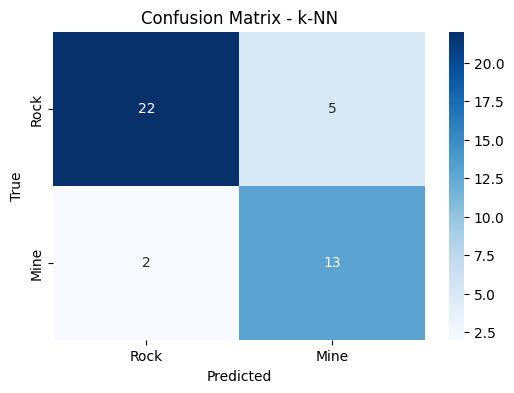

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rock", "Mine"], yticklabels=["Rock", "Mine"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(Y_test_encoded, knn_predictions, "k-NN")

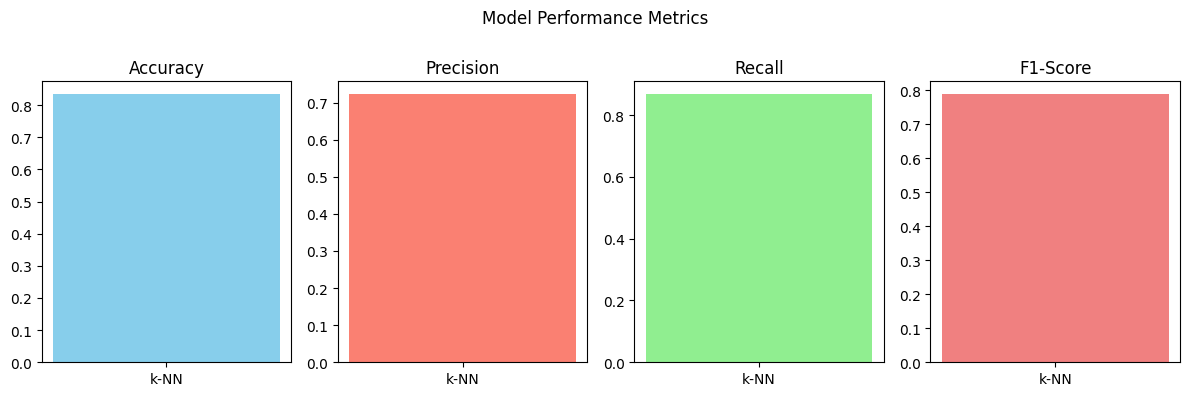

In [69]:
import matplotlib.pyplot as plt

models = ["k-NN"]
accuracy = [0.8333]
precision = [0.7222]
recall = [0.8667]
f1_score = [0.7879]

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Model Performance Metrics')

axs[0].bar(models, accuracy, color='skyblue')
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color='salmon')
axs[1].set_title('Precision')

axs[2].bar(models, recall, color='lightgreen')
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color='lightcoral')
axs[3].set_title('F1-Score')

plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.show()


###5)Support Vector Machines (SVM)

In [50]:
svm_predictions = svm.predict(X_test_scaled)

svm_accuracy = accuracy_score(Y_test_encoded, svm_predictions)
svm_precision = precision_score(Y_test_encoded, svm_predictions)
svm_recall = recall_score(Y_test_encoded, svm_predictions)
svm_f1 = f1_score(Y_test_encoded, svm_predictions)

model_performance["SVM"] = {
    "Accuracy": svm_accuracy,
    "Precision": svm_precision,
    "Recall": svm_recall,
    "F1-Score": svm_f1
}

#model performance summary
for model, metrics in model_performance.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Model: Logistic Regression
Accuracy: 0.7142857142857143
Precision: 0.5789473684210527
Recall: 0.7333333333333333
F1-Score: 0.6470588235294117
ROC-AUC: 0.8271604938271605

Model: Decision Trees
Accuracy: 0.7857142857142857
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272

Model: Random Forest
Accuracy: 0.8571428571428571
Precision: 0.8461538461538461
Recall: 0.7333333333333333
F1-Score: 0.7857142857142856
ROC-AUC: 0.945679012345679

Model: k-NN
Accuracy: 0.8333333333333334
Precision: 0.7222222222222222
Recall: 0.8666666666666667
F1-Score: 0.7878787878787877

Model: SVM
Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.8
F1-Score: 0.7741935483870969



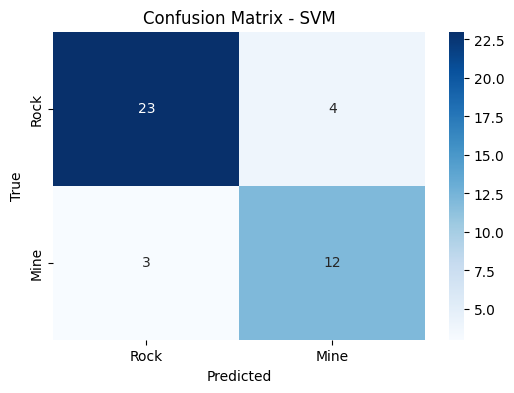

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rock", "Mine"], yticklabels=["Rock", "Mine"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(Y_test_encoded, svm_predictions, "SVM")

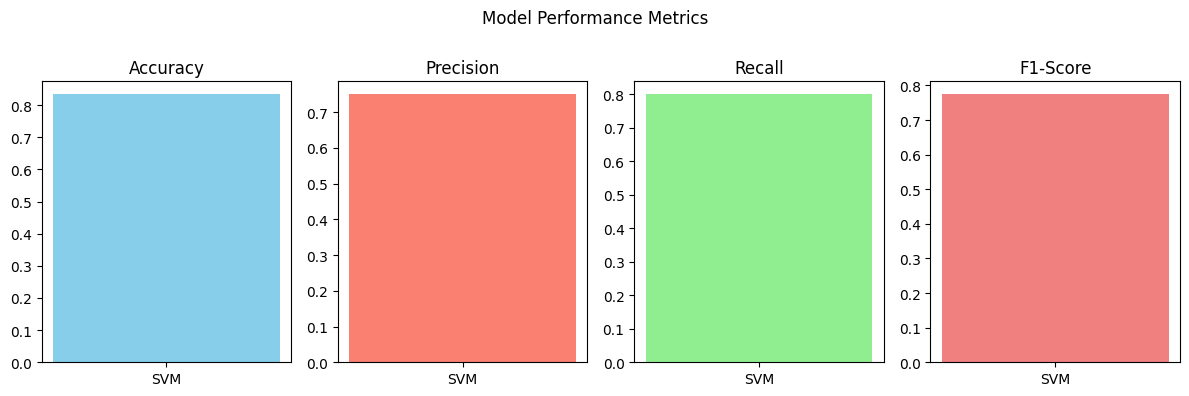

In [71]:
import matplotlib.pyplot as plt

models = ["SVM"]
accuracy = [0.8333]
precision = [0.75]
recall = [0.8]
f1_score = [0.7742]

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Model Performance Metrics')

axs[0].bar(models, accuracy, color='skyblue')
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color='salmon')
axs[1].set_title('Precision')

axs[2].bar(models, recall, color='lightgreen')
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color='lightcoral')
axs[3].set_title('F1-Score')

plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.show()


###6)Naive Bayes

In [51]:
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)

naive_bayes_accuracy = accuracy_score(Y_test_encoded, naive_bayes_predictions)
naive_bayes_precision = precision_score(Y_test_encoded, naive_bayes_predictions)
naive_bayes_recall = recall_score(Y_test_encoded, naive_bayes_predictions)
naive_bayes_f1 = f1_score(Y_test_encoded, naive_bayes_predictions)

model_performance["Naive Bayes"] = {
    "Accuracy": naive_bayes_accuracy,
    "Precision": naive_bayes_precision,
    "Recall": naive_bayes_recall,
    "F1-Score": naive_bayes_f1
}

#model performance summary
for model, metrics in model_performance.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

Model: Logistic Regression
Accuracy: 0.7142857142857143
Precision: 0.5789473684210527
Recall: 0.7333333333333333
F1-Score: 0.6470588235294117
ROC-AUC: 0.8271604938271605

Model: Decision Trees
Accuracy: 0.7857142857142857
Precision: 0.6666666666666666
Recall: 0.8
F1-Score: 0.7272727272727272

Model: Random Forest
Accuracy: 0.8571428571428571
Precision: 0.8461538461538461
Recall: 0.7333333333333333
F1-Score: 0.7857142857142856
ROC-AUC: 0.945679012345679

Model: k-NN
Accuracy: 0.8333333333333334
Precision: 0.7222222222222222
Recall: 0.8666666666666667
F1-Score: 0.7878787878787877

Model: SVM
Accuracy: 0.8333333333333334
Precision: 0.75
Recall: 0.8
F1-Score: 0.7741935483870969

Model: Naive Bayes
Accuracy: 0.7142857142857143
Precision: 0.5714285714285714
Recall: 0.8
F1-Score: 0.6666666666666666



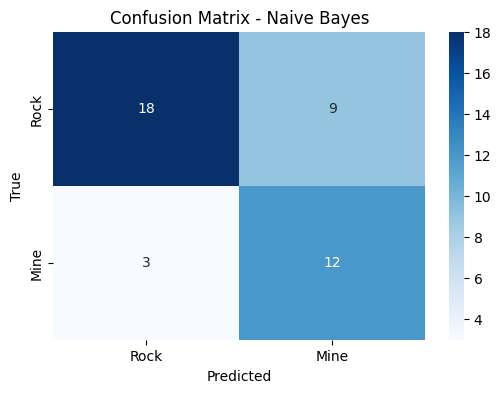

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rock", "Mine"], yticklabels=["Rock", "Mine"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(Y_test_encoded, naive_bayes_predictions, "Naive Bayes")

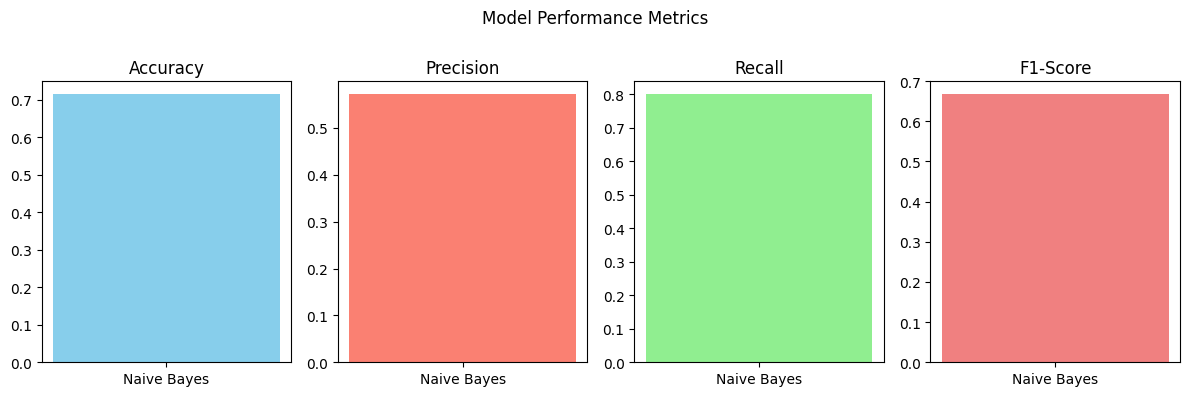

In [72]:
import matplotlib.pyplot as plt

models = ["Naive Bayes"]
accuracy = [0.7143]
precision = [0.5714]
recall = [0.8]
f1_score = [0.6667]

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
fig.suptitle('Model Performance Metrics')

axs[0].bar(models, accuracy, color='skyblue')
axs[0].set_title('Accuracy')

axs[1].bar(models, precision, color='salmon')
axs[1].set_title('Precision')

axs[2].bar(models, recall, color='lightgreen')
axs[2].set_title('Recall')

axs[3].bar(models, f1_score, color='lightcoral')
axs[3].set_title('F1-Score')

plt.tight_layout()
plt.subplots_adjust(top=0.8)

plt.show()


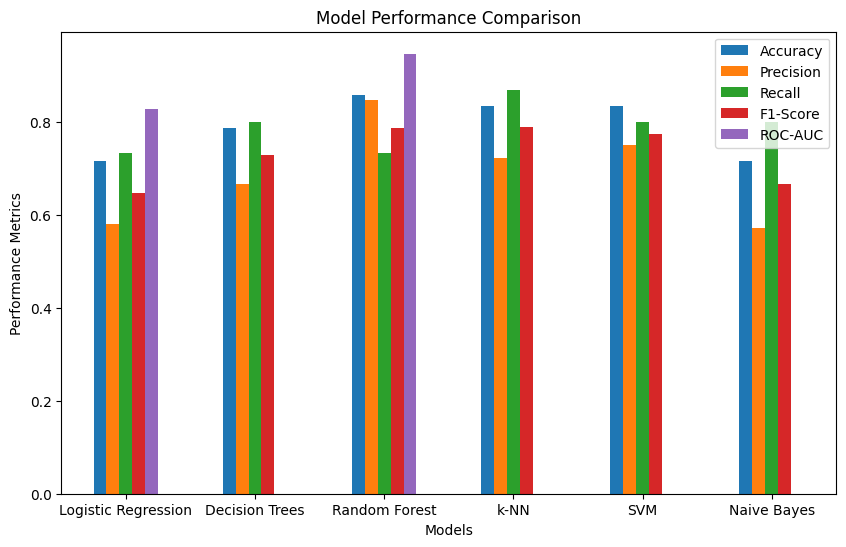

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

model_metrics = pd.DataFrame(model_performance).T

model_metrics.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Performance Metrics')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()




Random Forest seems to have the highest accuracy, precision, and F1-score, along with the highest ROC-AUC. It appears to be the best-performing model based on these metrics.

k-NN and SVM are also strong contenders, with high accuracy, precision, recall, and F1-scores.

Decision Trees are performing well but slightly behind Random Forest, k-NN, and SVM in terms of most metrics.

Logistic Regression and Naive Bayes show slightly lower performance compared to the other models.



### k-fold cross-validation

In [63]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds (e.g., 5 for 5-fold cross-validation)
num_folds = 5

# Create a cross-validation object (k-fold)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Initialize your models (e.g., logistic_regression, random_forest, etc.)

# Perform cross-validation for each model
for model_name, model in models:
    # Use cross_val_score to evaluate the model on multiple folds
    scores = cross_val_score(model, X_train_scaled, Y_train_encoded, cv=kfold, scoring='accuracy')

    # Print the results for each fold and the mean performance
    print(f"Model: {model_name}")
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
    print(f"Mean Accuracy: {scores.mean()}\n")


Model: Random Forest
Fold 1 Accuracy: 0.6470588235294118
Fold 2 Accuracy: 0.9090909090909091
Fold 3 Accuracy: 0.8484848484848485
Fold 4 Accuracy: 0.9090909090909091
Fold 5 Accuracy: 0.8484848484848485
Mean Accuracy: 0.8324420677361853

Model: k-NN
Fold 1 Accuracy: 0.7647058823529411
Fold 2 Accuracy: 0.7878787878787878
Fold 3 Accuracy: 0.7575757575757576
Fold 4 Accuracy: 0.8484848484848485
Fold 5 Accuracy: 0.7272727272727273
Mean Accuracy: 0.7771836007130124

Model: SVM
Fold 1 Accuracy: 0.7647058823529411
Fold 2 Accuracy: 0.7878787878787878
Fold 3 Accuracy: 0.8787878787878788
Fold 4 Accuracy: 0.8181818181818182
Fold 5 Accuracy: 0.8787878787878788
Mean Accuracy: 0.8256684491978609



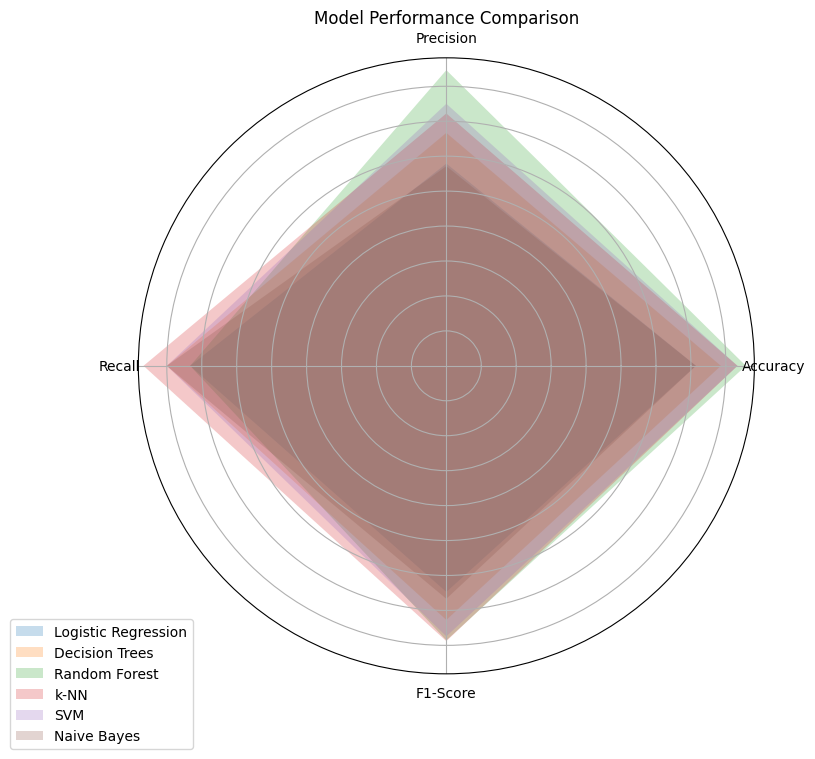

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# List of model names
models = ["Logistic Regression", "Decision Trees", "Random Forest", "k-NN", "SVM", "Naive Bayes"]


accuracy = [0.7143, 0.7857, 0.8571, 0.8333, 0.8333, 0.7143]
precision = [0.5789, 0.6667, 0.8462, 0.7222, 0.75, 0.5714]
recall = [0.7333, 0.8, 0.7333, 0.8667, 0.8, 0.8]
f1_score = [0.6471, 0.7273, 0.7857, 0.7879, 0.7742, 0.6667]


num_metrics = 4


angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})


for i, model in enumerate(models):
    values = [accuracy[i], precision[i], recall[i], f1_score[i]]
    values += values[:1]
    ax.fill(angles, values, alpha=0.25, label=model)


ax.set_xticks(angles[:-1])
ax.set_xticklabels(["Accuracy", "Precision", "Recall", "F1-Score"])
ax.set_yticklabels([])
ax.set_title("Model Performance Comparison")


ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))


plt.show()
